# Quantum circuits

Circuits are the heart of quantum algorithms, and where their possible advantage is coming from. Quantum circuits are what classical computer cannot do.

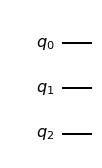

In [17]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)  # circuit with 3 qubits
circuit.draw()

Gates can be added with circuit methods, e.g. `QuantumCircuit.h` for the Hadamard gate and `QuantumCircuit.cx` for the CNOT gate.

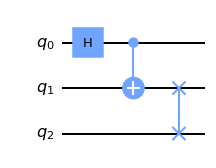

In [18]:
circuit.h(0)  # Hadamard on qubit 0
circuit.cx(0, 1)  # CNOT gate, controlled on 0 and acting on 1
circuit.swap(1, 2)  # SWAP gate on qubits 1 and 2

circuit.draw()

## Simulating a circuit

Circuits can be simulated with a range of Qiskit's built-in simulators.

### Circuits as unitary matrices

If a circuit contains only unitary operations, we can represent it as a unitary matrix. In Qiskit this can be done (for small numbers of qubits!) with the `qiskit.quantum_info.Operator` class.

In [19]:
from qiskit.quantum_info import Operator

u = Operator(circuit)
print(u)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
           -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.70710678+0.j, -0.70710678+0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.70710678+0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j

**Sharp bit:** The tensor order in Qiskit puts qubit 0 on the _leftmost_ side. This is the opposite to many Physics textbooks (such as Nielsen & Chuang).

### Simulating the quantum state

If the qubits are initially in state $|0\rangle$, we can obtain the statevector after applying the quantum circuit as

In [20]:
from qiskit.quantum_info import Statevector

sv = Statevector(circuit)
print(sv)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


### Simulating a quantum computer

So far, we've relied on exact matrix calculations. On a real quantum computer, we only have access to binary qubit measurements. Since measuring qubits projects them on a basis state, each measurement only yields a single bitstring and not a complex statevector as above.

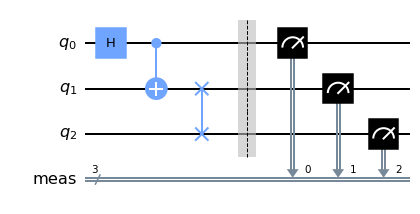

In [21]:
circuit.measure_all()
circuit.draw()

We can simulate this behavior with Qiskit's `QasmSimulator`. 

In [22]:
from qiskit.providers.aer import QasmSimulator

sim = QasmSimulator()

But since now we really want to execute the circuit, we have to make sure we only use gates our simulator or backend can use! Similar to a classical computer where you compile your C++ or Python program to machine instructions, we have to compile (or transpile) our circuit to quantum computer instructions.

In [23]:
from qiskit import transpile

transpiled = transpile(circuit, sim)

Now we can execute it:

In [24]:
job = sim.run(transpiled, shots=1024)  # execute the circuit 1024 times and store the binary outcomes
result = job.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.9.1', qobj_id='24bf6f65-9c0d-45b8-8298-bd6b6d16fc47', job_id='57b9bcfc-e1a5-40a2-be5f-ca9f4279015e', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 503, '0x5': 521}), header=QobjExperimentHeader(clbit_labels=[['meas', 0], ['meas', 1], ['meas', 2]], creg_sizes=[['meas', 3]], global_phase=0.0, memory_slots=3, metadata=None, n_qubits=3, name='circuit-113', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=2203892431, metadata={'parallel_state_update': 8, 'noise': 'ideal', 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 3, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1, 2], 'num_clbits': 3, 'input_qubit_map': [[2, 2], [0, 0], [1, 1]], 'fusion': {'enabled': False}}, time_taken=0.002701006)], date=2021-11-18T16:04:11.210434, status=COMPLETED, status=QobjHe

We are interested in the bitstrings we measured each time:

In [26]:
counts = result.get_counts()
counts

{'000': 503, '101': 521}

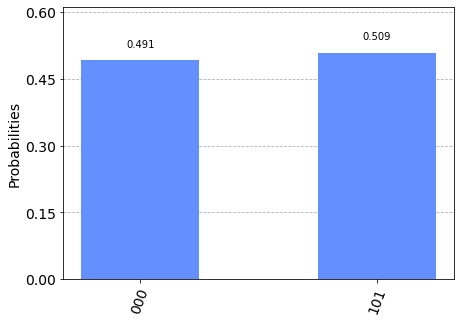

In [27]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### On a real backend

Let's run this circuit on an actual quantum computer! IBM provides a set of public devices (if you have an IQX account), such as `ibmq_lima`.

In [29]:
from qiskit.providers.ibmq import IBMQ

IBMQ.load_account()  # you have to enable your account the first time!
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_lima')

Now we'll do the same as before: transpile and run the circuit. Now this might take some time since our job queue's on IBM's servers until it's our turn to run the circuit.

In [31]:
transpiled = transpile(circuit, backend)
job = backend.run(transpiled, shots=1024) 
result = job.result()
print(result)

Result(backend_name='ibmq_lima', backend_version='1.0.25', qobj_id='5b22705d-c009-46cc-93d6-b080ba1529e2', job_id='61967b6ddf6b1d8229927894', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 469, '0x1': 27, '0x2': 16, '0x4': 34, '0x5': 471, '0x6': 4, '0x7': 3}), header=QobjExperimentHeader(clbit_labels=[['meas', 0], ['meas', 1], ['meas', 2]], creg_sizes=[['meas', 3]], global_phase=0.7853981633974483, memory_slots=3, metadata={}, n_qubits=5, name='circuit-113', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2021-11-18 16:23:04+00:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_lima', backend_version='1.0.25'), execution_id='cc8914b0-488b-11ec-94a9-b02628f7f59e', time_taken=3.5796492099761963, error=None, client_version={'qiskit': '0.32.0'})


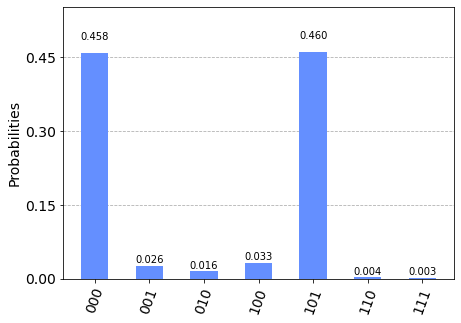

In [32]:
plot_histogram(result.get_counts())

## Parameterized quantum circuits

In near-term algorithms, we rely heavily on parameterized quantum circuits. There, we include gates with a continuous free parameters, for instance a parameterized Pauli rotation.

/opt/conda/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


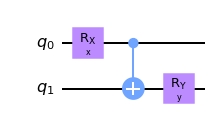

In [33]:
from qiskit.circuit import Parameter

x, y = Parameter("x"), Parameter("y")

pqc = QuantumCircuit(2)
pqc.rx(x, 0)  # rotate over angle "x" on qubit 0
pqc.cx(0, 1)
pqc.ry(y, 1)  # rotate over angle "y" on qubit 1

pqc.draw()

Before executing the circuit, we now need to bind the free parameters.

In [34]:
print(pqc.parameters)

ParameterView([Parameter(x), Parameter(y)])


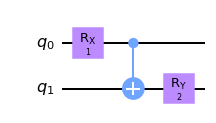

In [35]:
bound = pqc.bind_parameters([1, 2])  # alternatively you can pass a dictionary: {x: 1, y: 2}
bound.draw()

In [36]:
sv = Statevector(bound)
print(sv)

Statevector([0.47415988+0.j        , 0.        +0.40342268j,
             0.73846026+0.j        , 0.        -0.25903472j],
            dims=(2, 2))


## Qiskit's circuit library

Since the same circuit patterns occur frequently in different algorithms, Qiskit provides a library of valuable circuits: the circuit library.
"Valuable" here can mean different things; these circuit could be useful ansätze for variational algorithms (like the VQE), they could be difficult to model classically and thus might show a quantum advantage, or they are building blocks of larger algorithms.

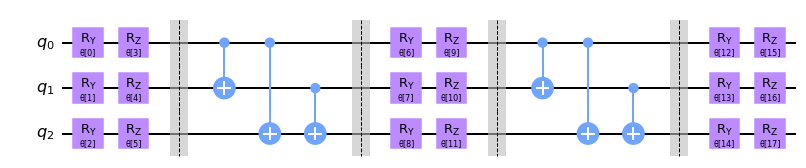

In [38]:
from qiskit.circuit.library import EfficientSU2

EfficientSU2(3, reps=2, insert_barriers=True).decompose().draw()

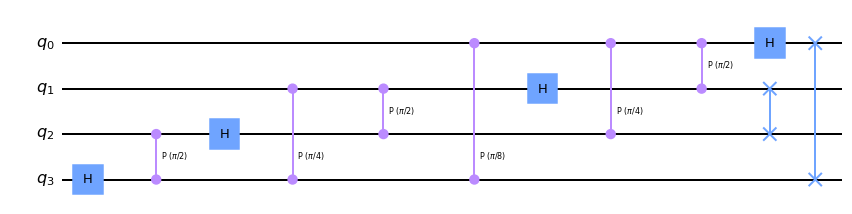

In [39]:
from qiskit.circuit.library import QFT

QFT(4).decompose().draw()